In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load your dataset
df = pd.read_csv('Rajshahi_Potatof.csv')
print(df.columns)

train_x = df.drop([' Production'], axis=1)
train_y = df[' Production']

Index(['YEAR', ' Production', 'RH2M', 'PRECTOTCORR', 'T2M', 'WS10M'], dtype='object')


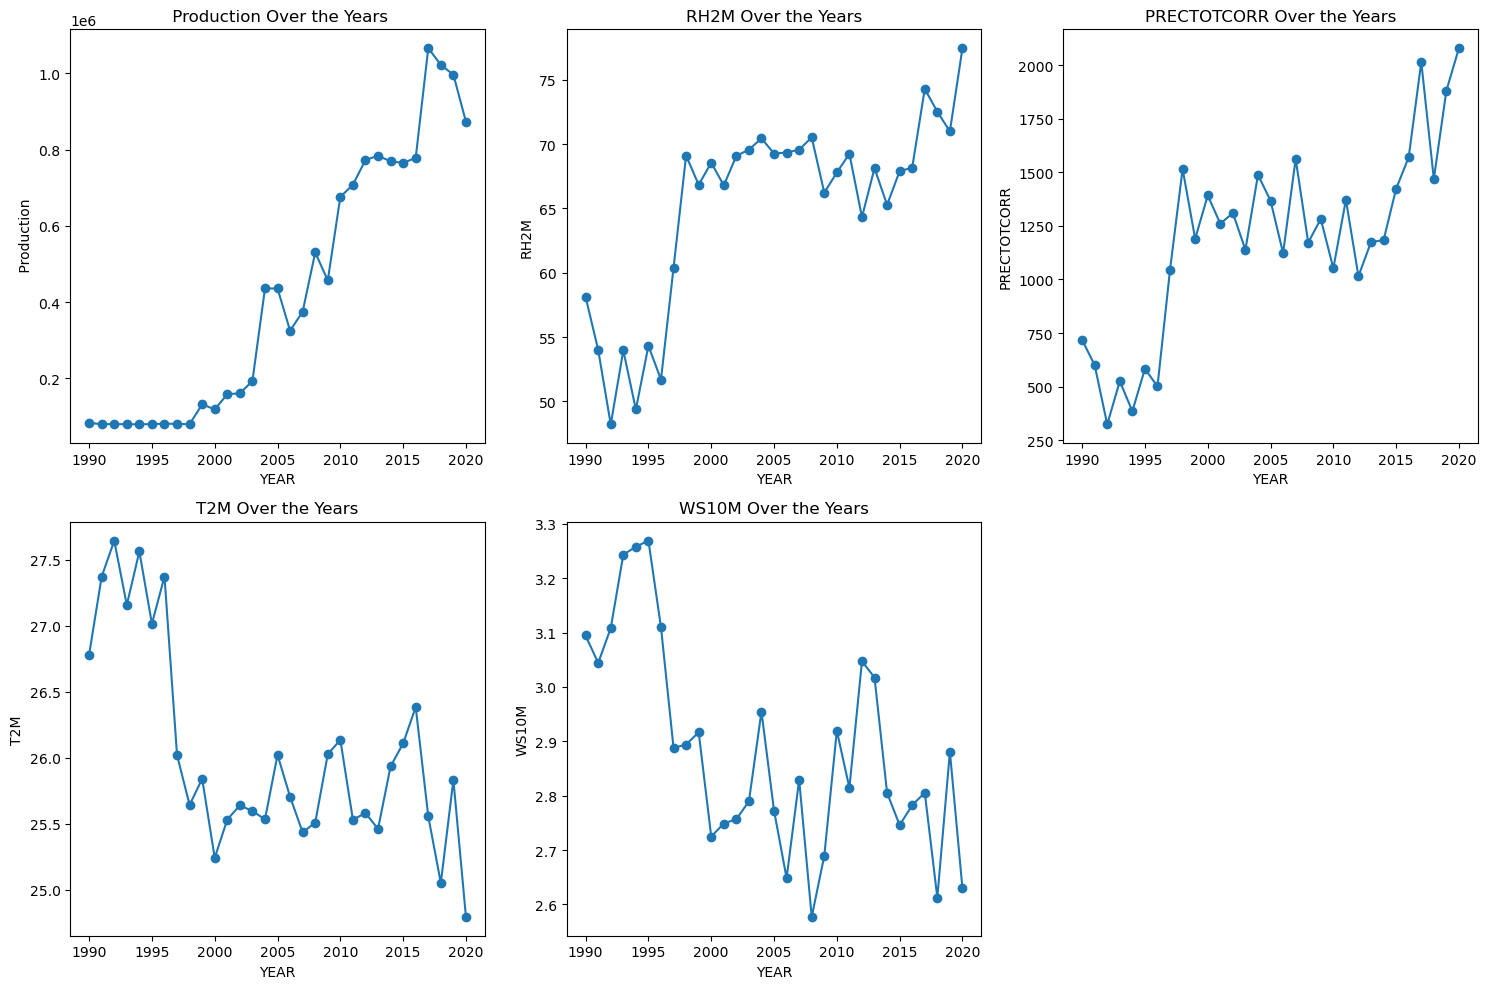

In [5]:
# Features: ' Production', 'RH2M', 'PRECTOTCORR', 'T2M', 'WS10M'

features = [' Production', 'RH2M', 'PRECTOTCORR', 'T2M', 'WS10M']

# Step 1: Visualize the Time Series Data
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Adjusted to have 2 rows and 3 columns
    plt.plot(df['YEAR'], df[feature], marker='o')
    plt.title(f'{feature} Over the Years')
    plt.xlabel('YEAR')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [2]:
train_X, test_X, train_Y, test_Y = train_test_split(train_x, train_y, test_size=0.20, random_state=42)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

scaler = StandardScaler(with_mean=False, with_std=False)
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

(24, 5) (24,) (7, 5) (7,)


In [3]:
# Initialize the random forest regressor
Rclf = RandomForestRegressor()

# Train the model
Rclf.fit(train_X, train_Y)

# Predict on the test set
y_pred = Rclf.predict(test_X)

# Calculate R-squared
r2 = r2_score(test_Y, y_pred)
print("R-squared:", r2)

# Train the model on the entire dataset
Rclf.fit(train_x, train_y)

# Calculate the predicted values on the training set
train_y_pred = Rclf.predict(train_x)

# Calculate R-squared for the training set
train_r2 = r2_score(train_y, train_y_pred)
print("Training R-squared:", train_r2)

R-squared: 0.8795360637130075
Training R-squared: 0.9924879312945054


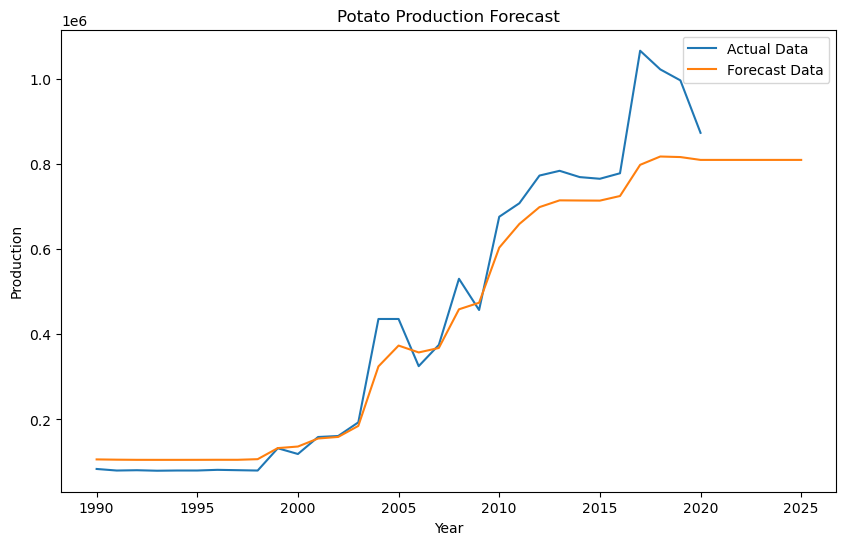

In [4]:
# Future production value prediction
future_years = np.arange(1990,2026)
future_data = pd.DataFrame({'YEAR': future_years,
                            'PRECTOTCORR': [0] * len(future_years),  # Replace with appropriate values
                            'RH2M': [0] * len(future_years),  # Replace with appropriate values
                            'T2M': [0] * len(future_years),  # Replace with appropriate values
                            'WS10M': [0] * len(future_years)  # Replace with appropriate values
                            })

# Reorder the columns to match the order during training
future_data = future_data[train_X.columns]

future_predictions = Rclf.predict(future_data)

# Plotting actual data and forecast data
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df[' Production'], label='Actual Data')
plt.plot(future_years, future_predictions, label='Forecast Data')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Potato Production Forecast')
plt.legend()
plt.show()